# Кейс-стади

Булыгин Олег:  
* [LinkedIn](linkedin.com/in/obulygin)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)
* [PythonTalk на Кью](https://yandex.ru/q/loves/pythontalk/)

# Рекомендательная система книг на примере работ Дарвина

In [1]:
# импорт библиотек
import glob         #https://docs.python.org/3/library/glob.html
import pandas as pd
import re
import seaborn as sns

In [2]:
# считаем все файлы, которые хранятся в папке (книги)
book_files = glob.glob('/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/*.txt')
book_files

['/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/VolcanicIslands.txt',
 '/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/MonographCirripediaVol2.txt',
 '/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/GeologicalObservationsSouthAmerica.txt',
 '/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/InsectivorousPlants.txt',
 '/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/DifferentFormsofFlowers.txt',
 '/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/FoundationsOriginofSpecies.txt',
 '/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/VariationPlantsAnimalsDomestication.txt',
 '/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/PowerMovementPlants.txt',
 '/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/ExpressionofEmotionManAnimals.txt',
 '/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/LifeandLettersVol2.txt',
 '/Users/velo1/SynologyDrive/GIT_syno/data/darwin_books/EffectsCrossSelfFertilization.txt',
 '/Users/velo1/SynologyDrive/GIT_syno

In [3]:
# создадим список названий книг и список текстов книг
texts = []
titles = []

for file in book_files:
    text = open(file).read()    # open()  - TextIOWrapper

    # cut off files extensions ( grouping sequence of \w  before '.txt' )  \w   -any word character
    title = re.search(r'(\w+)\.txt', file).group(1) # extract filename
    texts.append(text)
    titles.append(title)

In [4]:
print(titles)

['VolcanicIslands', 'MonographCirripediaVol2', 'GeologicalObservationsSouthAmerica', 'InsectivorousPlants', 'DifferentFormsofFlowers', 'FoundationsOriginofSpecies', 'VariationPlantsAnimalsDomestication', 'PowerMovementPlants', 'ExpressionofEmotionManAnimals', 'LifeandLettersVol2', 'EffectsCrossSelfFertilization', 'CoralReefs', 'LifeandLettersVol1', 'VoyageBeagle', 'Autobiography', 'FormationVegetableMould', 'DescentofMan', 'MovementClimbingPlants', 'MonographCirripedia', 'OriginofSpecies']


In [5]:
# Предположим, нам очень понравилась книга "Происхождение видов". 
# Какую книгу из всего списка, нам прочитать следующей, которая может понравится?
# Какие тексты могут считаться похожими?
texts[5][0:500]   #  layout 500 first symbols

"\n\n\nTHE FOUNDATIONS OF THE ORIGIN OF SPECIES\n\nCAMBRIDGE UNIVERSITY PRESS\n\nLondon: FETTER LANE, E.C.\n\nC. F. CLAY, MANAGER\n\n{Illustration}\n\nEdinburgh: 100, PRINCES STREET\n\nALSO\n\nLondon: H. K. LEWIS, 136, GOWER STREET, W.C.\n\nBerlin: A. ASHER AND CO.\n\nLeipzig: F. A. BROCKHAUS\n\nNew York: G. P. PUTNAM'S SONS\n\nBombay and Calcutta: MACMILLAN AND Co., LTD.\n\n_All rights reserved_\n\n{Illustration: Charles Darwin from a photograph by Maull & Fox in 1854}\n\n\n\n\nTHE FOUNDATIONS OF THE ORIGIN OF SPECIES\n\nTWO ESSAY"

In [6]:
# приведем все слова к нижнему регистру
texts_lower_case = [text.lower() for text in texts]

# проверим
texts_lower_case[5][0:500]

"\n\n\nthe foundations of the origin of species\n\ncambridge university press\n\nlondon: fetter lane, e.c.\n\nc. f. clay, manager\n\n{illustration}\n\nedinburgh: 100, princes street\n\nalso\n\nlondon: h. k. lewis, 136, gower street, w.c.\n\nberlin: a. asher and co.\n\nleipzig: f. a. brockhaus\n\nnew york: g. p. putnam's sons\n\nbombay and calcutta: macmillan and co., ltd.\n\n_all rights reserved_\n\n{illustration: charles darwin from a photograph by maull & fox in 1854}\n\n\n\n\nthe foundations of the origin of species\n\ntwo essay"

In [7]:
# уберем все служебные символы
print(len(texts_lower_case[5]))

# substitute any non-word character and '_' with ' ' 
only_words_text = [re.sub('[\W_]+', ' ', text) for text in texts_lower_case]

# проверим
print(len(only_words_text[5]))
only_words_text[5][0:500]

557591
523021


' the foundations of the origin of species cambridge university press london fetter lane e c c f clay manager illustration edinburgh 100 princes street also london h k lewis 136 gower street w c berlin a asher and co leipzig f a brockhaus new york g p putnam s sons bombay and calcutta macmillan and co ltd all rights reserved illustration charles darwin from a photograph by maull fox in 1854 the foundations of the origin of species two essays written in 1842 and 1844 by charles darwin edited by hi'

In [8]:
# checking the remaining symbols
for i, text in enumerate(only_words_text):
    print(f'{i:>3}: {len(set(text)):>4}')
print(set(only_words_text[0]))
print(set(only_words_text[1]))

  0:   37
  1:   67
  2:   37
  3:   37
  4:   37
  5:   43
  6:   53
  7:   45
  8:   39
  9:   37
 10:   39
 11:   37
 12:   37
 13:   37
 14:   37
 15:   37
 16:   48
 17:   37
 18:   50
 19:   43
{'9', 'o', 'y', 'l', 'z', 'h', 'f', 'm', 'i', 't', 'x', 'v', '5', '2', '4', 'k', 'g', '7', 'd', 'w', 'c', ' ', 'b', 'e', 's', 'n', '1', '8', '0', 'u', 'q', '6', '3', 'j', 'a', 'r', 'p'}
{'9', 'o', 'ù', 'ê', 'χ', 'ì', 'y', 'l', 'á', 'z', 'h', 'f', 'm', 't', 'i', 'x', 'à', 'v', '5', 'σ', 'ι', '2', 'é', '4', 'î', 'k', 'α', 'g', '7', 'ü', 'd', 'w', 'c', 'ö', 'ô', 'υ', 'φ', 'œ', 'ë', 'μ', ' ', 'b', 'e', 'ε', 'æ', 's', 'n', 'π', 'ò', '1', '8', '0', 'u', 'ä', 'q', 'ω', '3', '6', 'ν', 'λ', 'ς', 'j', 'a', 'â', 'r', 'è', 'p'}


In [9]:
# разделим все на слова
texts_splitted = [text.split() for text in only_words_text]

# сколько слов?
len(texts_splitted[5])

92386

In [10]:
import nltk
from nltk.corpus import stopwords
# import nltk.corpus.stopwords

In [11]:
nltk.download('stopwords')
stopwords_russet = set(stopwords.words('russian'))
stopwords_russet

[nltk_data] Downloading package stopwords to /Users/velo1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [12]:
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
stopwords_set

[nltk_data] Downloading package stopwords to /Users/velo1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
# generating a list of words without stopwords 
without_sw = [[word for word in text if word not in stopwords_set] for text in texts_splitted]
len(without_sw[5])

49656

In [14]:
without_sw[5]

['foundations',
 'origin',
 'species',
 'cambridge',
 'university',
 'press',
 'london',
 'fetter',
 'lane',
 'e',
 'c',
 'c',
 'f',
 'clay',
 'manager',
 'illustration',
 'edinburgh',
 '100',
 'princes',
 'street',
 'also',
 'london',
 'h',
 'k',
 'lewis',
 '136',
 'gower',
 'street',
 'w',
 'c',
 'berlin',
 'asher',
 'co',
 'leipzig',
 'f',
 'brockhaus',
 'new',
 'york',
 'g',
 'p',
 'putnam',
 'sons',
 'bombay',
 'calcutta',
 'macmillan',
 'co',
 'ltd',
 'rights',
 'reserved',
 'illustration',
 'charles',
 'darwin',
 'photograph',
 'maull',
 'fox',
 '1854',
 'foundations',
 'origin',
 'species',
 'two',
 'essays',
 'written',
 '1842',
 '1844',
 'charles',
 'darwin',
 'edited',
 'son',
 'francis',
 'darwin',
 'honorary',
 'fellow',
 'christ',
 'college',
 'cambridge',
 'university',
 'press',
 '1909',
 'astronomers',
 'might',
 'formerly',
 'said',
 'god',
 'ordered',
 'planet',
 'move',
 'particular',
 'destiny',
 'manner',
 'god',
 'orders',
 'animal',
 'created',
 'certain',
 'for

Произведем лемматизацию

Лемматизация — процесс приведения словоформы к лемме — её нормальной (словарной) форме. 
В русском языке:
- для существительных — именительный падеж, единственное число;
- для прилагательных — именительный падеж, единственное число, мужской род;
- для глаголов, причастий, деепричастий — глагол в инфинитиве несовершенного вида.

В других языках – по аналогии.

In [15]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /Users/velo1/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/velo1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_text = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in without_sw]
lemmatized_text[5]

['foundation',
 'origin',
 'specie',
 'cambridge',
 'university',
 'press',
 'london',
 'fetter',
 'lane',
 'e',
 'c',
 'c',
 'f',
 'clay',
 'manager',
 'illustration',
 'edinburgh',
 '100',
 'prince',
 'street',
 'also',
 'london',
 'h',
 'k',
 'lewis',
 '136',
 'gower',
 'street',
 'w',
 'c',
 'berlin',
 'asher',
 'co',
 'leipzig',
 'f',
 'brockhaus',
 'new',
 'york',
 'g',
 'p',
 'putnam',
 'son',
 'bombay',
 'calcutta',
 'macmillan',
 'co',
 'ltd',
 'right',
 'reserved',
 'illustration',
 'charles',
 'darwin',
 'photograph',
 'maull',
 'fox',
 '1854',
 'foundation',
 'origin',
 'specie',
 'two',
 'essay',
 'written',
 '1842',
 '1844',
 'charles',
 'darwin',
 'edited',
 'son',
 'francis',
 'darwin',
 'honorary',
 'fellow',
 'christ',
 'college',
 'cambridge',
 'university',
 'press',
 '1909',
 'astronomer',
 'might',
 'formerly',
 'said',
 'god',
 'ordered',
 'planet',
 'move',
 'particular',
 'destiny',
 'manner',
 'god',
 'order',
 'animal',
 'created',
 'certain',
 'form',
 'cert

In [17]:
# https://www.machinelearningplus.com/nlp/gensim-tutorial/
# библиотека gensim позволяет эффективно работать с корпусами текстов
from gensim import corpora

In [18]:
# создадим словарь, в котором присвоем каждому словую свой уникальный id
dictionary = corpora.Dictionary(lemmatized_text)  #  to associate each word in the corpus with a unique integer ID
dict(dictionary)

{0: '0',
 1: '000',
 2: '015',
 3: '09',
 4: '1',
 5: '10',
 6: '106',
 7: '11',
 8: '110',
 9: '113',
 10: '115',
 11: '119',
 12: '12',
 13: '120',
 14: '13',
 15: '131',
 16: '136',
 17: '14',
 18: '147',
 19: '15',
 20: '1502',
 21: '154',
 22: '159',
 23: '161',
 24: '166',
 25: '17',
 26: '171',
 27: '176',
 28: '1768',
 29: '18',
 30: '180',
 31: '1804',
 32: '1805',
 33: '1831',
 34: '1834',
 35: '1835',
 36: '1836',
 37: '1838',
 38: '1839',
 39: '184',
 40: '1840',
 41: '1841',
 42: '1842',
 43: '1843',
 44: '1844',
 45: '185',
 46: '1874',
 47: '1876',
 48: '189',
 49: '190',
 50: '191',
 51: '195',
 52: '197',
 53: '1st',
 54: '2',
 55: '20',
 56: '200',
 57: '201',
 58: '202',
 59: '204',
 60: '205',
 61: '21',
 62: '210',
 63: '214',
 64: '219',
 65: '22',
 66: '221',
 67: '222',
 68: '225',
 69: '228',
 70: '230',
 71: '236',
 72: '24',
 73: '243',
 74: '245',
 75: '246',
 76: '25',
 77: '260',
 78: '266',
 79: '27',
 80: '271',
 81: '272',
 82: '274',
 83: '28',
 84: '2

In [91]:
len(dict(dictionary))

36342

Создадим на основе словаря модель [Bag Of WordS](https://en.wikipedia.org/wiki/Bag-of-words_model), которая присваивает каждому слову (id) количество его вхождений в конкретном документе

In [92]:
bows = [dictionary.doc2bow(text) for text in lemmatized_text]  # doc2bow() -create the bag-of-word representation for a document 
bows[5]   
# The first entry in each tuple corresponds to the ID of the token in the dictionary, 
# the second corresponds to the count of this token.

[(1, 2),
 (4, 25),
 (5, 11),
 (6, 11),
 (7, 14),
 (8, 8),
 (9, 14),
 (10, 9),
 (11, 7),
 (12, 10),
 (13, 10),
 (14, 11),
 (15, 15),
 (16, 5),
 (17, 5),
 (18, 11),
 (19, 12),
 (21, 5),
 (22, 8),
 (23, 4),
 (24, 5),
 (25, 12),
 (26, 6),
 (27, 4),
 (29, 12),
 (30, 2),
 (31, 1),
 (33, 1),
 (35, 2),
 (36, 1),
 (37, 2),
 (38, 7),
 (39, 8),
 (40, 1),
 (41, 1),
 (42, 54),
 (44, 45),
 (45, 6),
 (47, 2),
 (48, 7),
 (49, 5),
 (50, 5),
 (51, 4),
 (52, 5),
 (53, 3),
 (54, 17),
 (55, 10),
 (56, 8),
 (57, 5),
 (58, 5),
 (59, 8),
 (60, 7),
 (61, 5),
 (62, 5),
 (63, 11),
 (64, 7),
 (65, 7),
 (66, 4),
 (67, 5),
 (68, 7),
 (69, 4),
 (70, 7),
 (71, 7),
 (72, 7),
 (73, 2),
 (74, 3),
 (75, 3),
 (76, 11),
 (77, 3),
 (78, 3),
 (79, 10),
 (80, 3),
 (81, 4),
 (82, 2),
 (83, 7),
 (85, 5),
 (86, 2),
 (87, 3),
 (88, 6),
 (89, 23),
 (90, 11),
 (91, 3),
 (92, 12),
 (93, 2),
 (94, 2),
 (95, 4),
 (96, 8),
 (97, 4),
 (98, 3),
 (99, 3),
 (100, 2),
 (101, 3),
 (102, 2),
 (103, 8),
 (104, 5),
 (105, 12),
 (106, 4),
 (107,

In [93]:
# для примера посмотрим на bow в виде датафрейма для книги "Происхождене видов"
bow_oos = pd.DataFrame(bows[5])

bow_oos.columns = ['index', 'occurrences']
bow_oos

,index,occurrences
0,1,2
1,4,25
2,5,11
3,6,11
4,7,14
...,...,...
5515,16311,1
5516,16312,2
5517,16313,2
5518,16314,1


In [94]:
# смэтчим индексы с реальными словами
bow_oos['word'] = [dictionary[index] for index in bow_oos['index']]
bow_oos

,index,occurrences,word
0,1,2,000
1,4,25,1
2,5,11,10
3,6,11,106
4,7,14,11
...,...,...,...
5515,16311,1,zanzibar
5516,16312,2,zool
5517,16313,2,ægilops
5518,16314,1,ærate


Создадим модель [TF-IDF](https://ru.wikipedia.org/wiki/TF-IDF) (term frequency-inverse document frequency – частотность терминов times обратная частотность документов)

Если слово встречается в каком-либо документе часто, при этом встречаясь редко во всех остальных документах — это слово имеет большую значимость для исходного документа.

In [95]:
from gensim.models import TfidfModel
tfidf = TfidfModel(bows)  
# The tf-idf model transforms vectors from the bag-of-words representation 
# to a vector space where the frequency counts are weighted 
# according to the relative rarity of each word in the corpus.

# посмотрим, как это выглядит на "Происхождение видов"
tfidf[bows[5]]

# а почему здесь не все индексы?

[(1, 0.0006865200438592466),
 (5, 0.0008679449160810767),
 (6, 0.004867930500732169),
 (7, 0.0011046571659213704),
 (8, 0.0027460801754369863),
 (9, 0.00927738100856967),
 (10, 0.003982852227871775),
 (11, 0.004638690504284835),
 (12, 0.0007890408328009788),
 (13, 0.0016207527711296597),
 (14, 0.0008679449160810767),
 (15, 0.008230055161156697),
 (16, 0.003313350360203454),
 (18, 0.007289370792447598),
 (21, 0.0027433517203855656),
 (22, 0.005301360576325526),
 (23, 0.0031431966334392824),
 (24, 0.003928995791799103),
 (25, 0.0009468489993611746),
 (26, 0.005517888573013308),
 (27, 0.0036785923820088725),
 (29, 0.0009468489993611746),
 (30, 0.00032415055422593196),
 (31, 0.001614933361754165),
 (33, 0.0007857991583598206),
 (35, 0.0010973406881542263),
 (36, 0.0006626700720406908),
 (37, 0.0008850782728603943),
 (38, 0.004638690504284835),
 (39, 0.004389362752616905),
 (40, 0.0005486703440771132),
 (41, 0.00016207527711296598),
 (42, 0.029628198580164113),
 (44, 0.011250073299754236),


In [96]:
len(tfidf[bows[5]]) # an array (vector) representing 'THE FOUNDATIONS OF THE ORIGIN OF SPECIES'

4907

Теперь каждый наш текст представлен по-сути вектором чисел. Сходство между ними мы можем определить при помощи [косинусного сходства](https://www.machinelearningplus.com/nlp/cosine-similarity/) между соответствующими векторами.

In [97]:
from gensim import similarities  # https://www.machinelearningplus.com/nlp/gensim-tutorial/
cos_sim = similarities.MatrixSimilarity(tfidf[bows])

# преобразуем в датафрейм
cos_sim_df = pd.DataFrame(list(cos_sim))

In [98]:
len(list(cos_sim))

20

In [107]:
# добавним название текстов
cos_sim_df.columns = titles
cos_sim_df.index = titles
print(cos_sim_df.shape)
cos_sim_df

(20, 20)


,VolcanicIslands,MonographCirripediaVol2,GeologicalObservationsSouthAmerica,InsectivorousPlants,DifferentFormsofFlowers,FoundationsOriginofSpecies,VariationPlantsAnimalsDomestication,PowerMovementPlants,ExpressionofEmotionManAnimals,LifeandLettersVol2,EffectsCrossSelfFertilization,CoralReefs,LifeandLettersVol1,VoyageBeagle,Autobiography,FormationVegetableMould,DescentofMan,MovementClimbingPlants,MonographCirripedia,OriginofSpecies
VolcanicIslands,1.000000,0.016313,0.385193,0.010180,0.001124,0.018903,0.013000,0.004987,0.006113,0.016113,0.002159,0.059501,0.037563,0.128871,0.037590,0.034722,0.009154,0.003059,0.010461,0.039190
MonographCirripediaVol2,0.016313,1.000000,0.022361,0.019061,0.002204,0.011053,0.029099,0.025188,0.027521,0.009589,0.002622,0.010229,0.011876,0.023426,0.007835,0.014288,0.040959,0.007542,0.543834,0.038530
GeologicalObservationsSouthAmerica,0.385193,0.022361,1.000000,0.007598,0.001029,0.028426,0.013786,0.004504,0.005932,0.016848,0.002047,0.060472,0.039469,0.242660,0.028217,0.037423,0.010329,0.002333,0.009012,0.054994
InsectivorousPlants,0.010180,0.019061,0.007598,1.000000,0.003209,0.005698,0.009945,0.023903,0.012463,0.026381,0.006620,0.002519,0.009129,0.014241,0.014682,0.020794,0.009282,0.246779,0.018196,0.013378
DifferentFormsofFlowers,0.001124,0.002204,0.001029,0.003209,1.000000,0.014506,0.019041,0.008442,0.002627,0.031032,0.197517,0.000775,0.007603,0.004850,0.018233,0.002740,0.028440,0.003215,0.003540,0.049653
FoundationsOriginofSpecies,0.018903,0.011053,0.028426,0.005698,0.014506,1.000000,0.187001,0.009667,0.045625,0.078543,0.030494,0.021765,0.080163,0.083689,0.054001,0.012384,0.128108,0.004118,0.007971,0.310112
VariationPlantsAnimalsDomestication,0.013000,0.029099,0.013786,0.009945,0.019041,0.187001,1.000000,0.022485,0.078050,0.071117,0.049401,0.011092,0.073769,0.102258,0.040736,0.018784,0.219339,0.012259,0.021506,0.394684
PowerMovementPlants,0.004987,0.025188,0.004504,0.023903,0.008442,0.009667,0.022485,1.000000,0.013325,0.019632,0.043478,0.003093,0.015395,0.024801,0.013754,0.028801,0.012894,0.114931,0.020966,0.019559
ExpressionofEmotionManAnimals,0.006113,0.027521,0.005932,0.012463,0.002627,0.045625,0.078050,0.013325,1.000000,0.073372,0.006028,0.005144,0.087756,0.089197,0.074814,0.014286,0.150429,0.007529,0.015603,0.060706
LifeandLettersVol2,0.016113,0.009589,0.016848,0.026381,0.031032,0.078543,0.071117,0.019632,0.073372,0.999999,0.045180,0.025543,0.728632,0.099815,0.270213,0.022679,0.125322,0.028074,0.007420,0.142723


<AxesSubplot: >

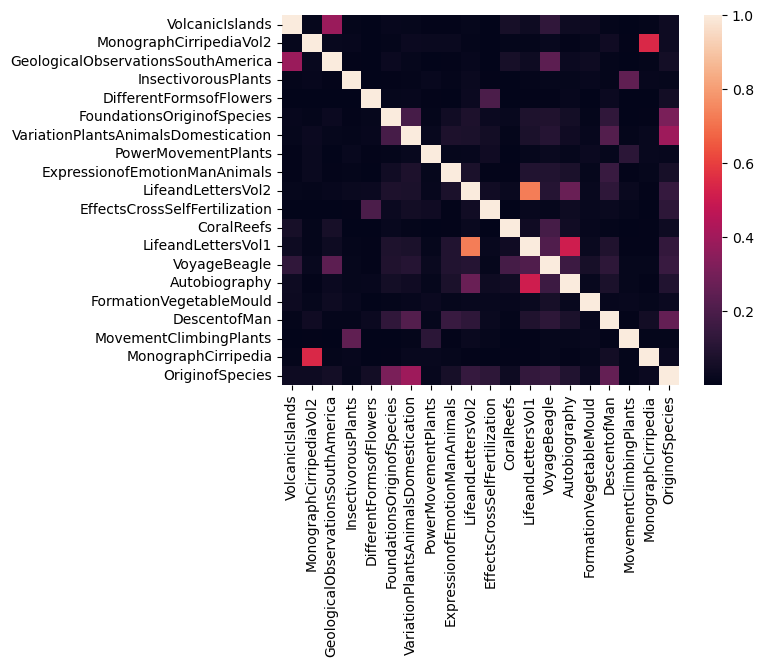

In [100]:
sns.heatmap(cos_sim_df)

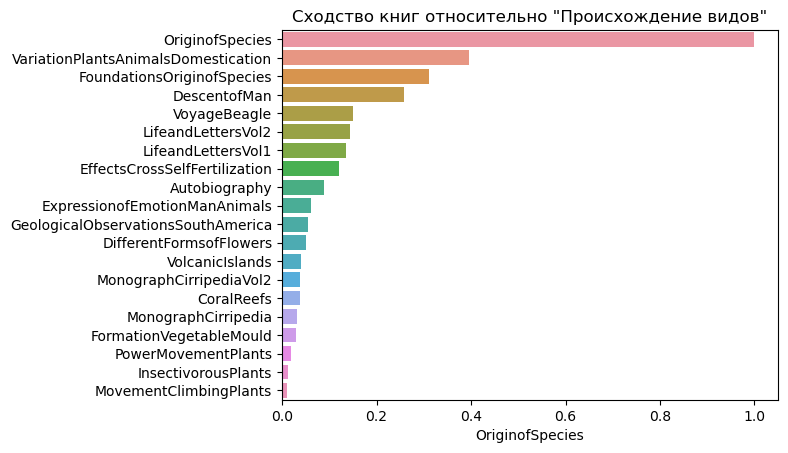

In [108]:
cos_sim_oos = cos_sim_df[['OriginofSpecies']].sort_values('OriginofSpecies', ascending=False) # sort relative to 'OriginofSpecies' as base
cos_sim_oos
ax = sns.barplot(y=cos_sim_oos.index, x=cos_sim_oos.OriginofSpecies, orient='h')
ax.set_title('Сходство книг относительно "Происхождение видов"');

Проведем кластеризацию книг при помощи [метода Уорда](https://neerc.ifmo.ru/wiki/index.php?title=%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F).  
Метод Уорда основан на объединении не максимально близких кластеров, а тех, `слияние которых дает наименьший прирост внутрикластерной дисперсии`.  
Этот метод применяется для задач с **близко расположенными кластерами.**

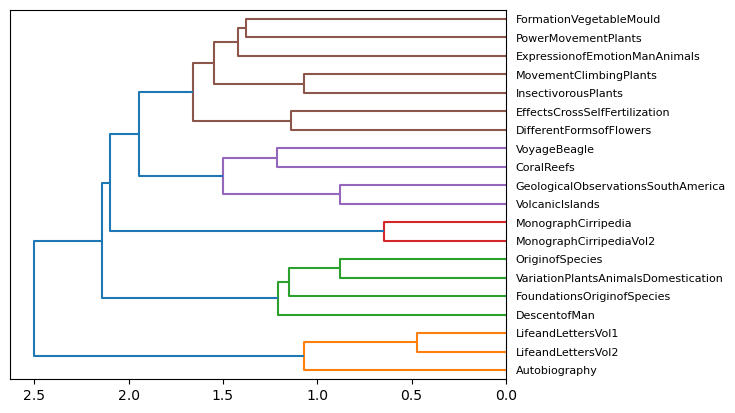

In [112]:
from scipy.cluster import hierarchy
clusters = hierarchy.linkage(cos_sim_df, method='ward')

dendrogram = hierarchy.dendrogram(clusters, 
                                  leaf_font_size=8, 
                                  labels=list(cos_sim_df.index), 
                                  orientation="left")